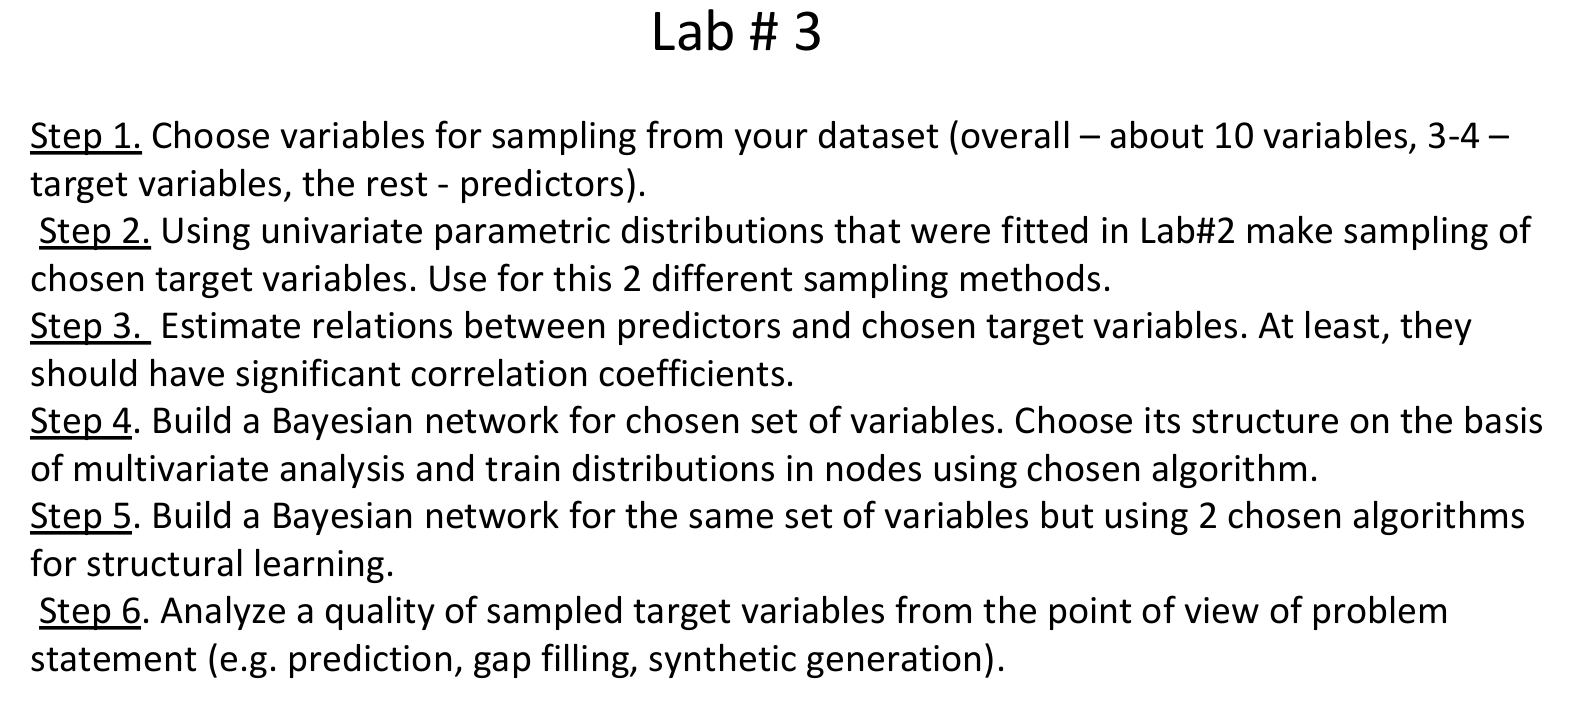

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import make_dataset

In [2]:
cols = pd.read_csv('columns_description.csv')
# cols.columns
print(cols['description'])

0                                     date (YYYY-MM-DD)
1                                          hour (HH:00)
2     Amount of precipitation in millimetres (last h...
3            Atmospheric pressure at station level (mb)
4     Maximum air pressure for the last hour in hPa ...
5     Minimum air pressure for the last hour in hPa ...
6                                 Solar radiation KJ/m2
7          Air temperature (instant) in celsius degrees
8     Dew point temperature (instant) in celsius deg...
9     Maximum temperature for the last hour in celsi...
10    Minimum temperature for the last hour in celsi...
11    Maximum dew point temperature for the last hou...
12    Minimum dew point temperature for the last hou...
13    Maximum relative humid temperature for the las...
14    Minimum relative humid temperature for the las...
15                        Relative humid in % (instant)
16             Wind direction in radius degrees (0-360)
17                       Wind gust in metres per

In [3]:
def prepare_df(df):
    abbreviation = ['date','hour','prcp', 'stp', 'smax', 'smin','gbrd','temp','dewp','tmax','tmin','dmax','dmin','hmax','hmin','hmdy','wdct', 'gust', 'wdsp', 'regi','prov','wsnm','inme','lat','lon','elvt']

    
    df.drop(['index'],inplace=True, axis=1)
    df.columns = abbreviation
    df = make_dataset.clean_na(df)
    df['date_time'] = pd.to_datetime(df['date'] + ' ' +  df['hour'])
    df.drop(['date','hour'], inplace=True, axis=1)

    return df

In [4]:
source_df = pd.read_csv("south20k.csv", engine='python')
# source_df = prepare_df(source_df)
source_df

,Unnamed: 0,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,...,gust,wdsp,regi,prov,wsnm,inme,lat,lon,elvt,date_time
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 00:00:00
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 01:00:00
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 02:00:00
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 03:00:00
4,4,0.0,1013.9,1014.2,1013.2,NaN,15.5,14.6,15.6,15.5,...,4.4,1.2,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 03:00:00
19996,19996,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 04:00:00
19997,19997,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 05:00:00
19998,19998,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 06:00:00


In [5]:
prcp = source_df['prcp'].dropna()
gbrd = source_df['gbrd'].dropna()
temp = source_df['temp'].dropna()

SAMPLING

To start with, let’s have a look at some basic terminology. It is important to learn the concepts of population and sample. The population is the set of all observations (individuals, objects, events, or procedures) and is usually very large and diverse, whereas a sample is a subset of observations from the population that ideally is a true representation of the population.

**Inverse transform sampling**

In [19]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins=40, n_samples=19900):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r), cum_values[1:]

def plot_CDF(x):
    plt.plot(x)
    plt.title("inverse CDF")
    plt.xlabel("sample space")
    plt.ylabel("uniform labels")
    
def plot_true_sampling(true_vals, sampling):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(true_vals, label='True', bins = 20, color='blue', alpha=0.5)
    ax.hist(sampling, label='sampeled', bins = 20, color='yellow', alpha=0.5)
    ax.legend(loc='upper right')
    plt.ylabel("Count")
    plt.show()

Target vars:

**Stp, wdsp, temp**

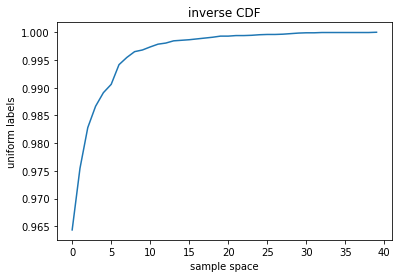

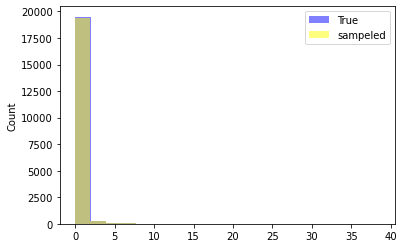

In [20]:
# get CDF

sampling_prcp, CDF_prcp = inverse_transform_sampling(prcp)

plot_CDF(CDF_prcp)
plot_true_sampling(prcp, sampling_prcp)

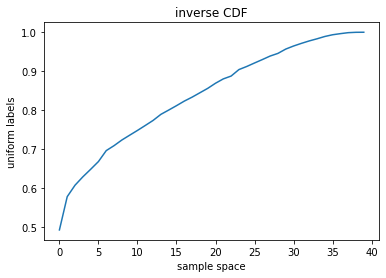

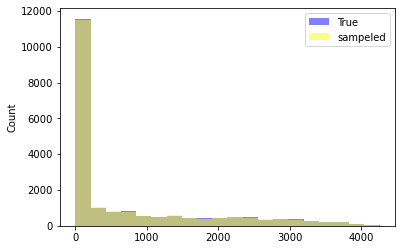

In [21]:
sampling_gbrd, CDF_gbrd = inverse_transform_sampling(gbrd)

plot_CDF(CDF_gbrd)
plot_true_sampling(gbrd, sampling_gbrd)

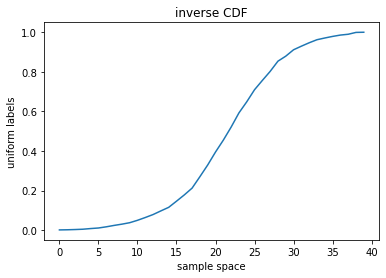

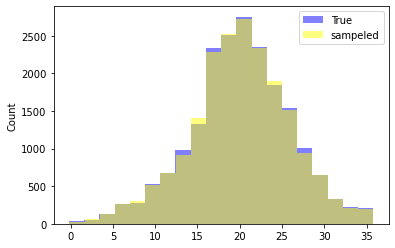

In [22]:
sampling_temp, CDF_temp = inverse_transform_sampling(temp)
plot_CDF(CDF_temp)
plot_true_sampling(temp, sampling_temp)

**Random sampling**

Variable - Temperature

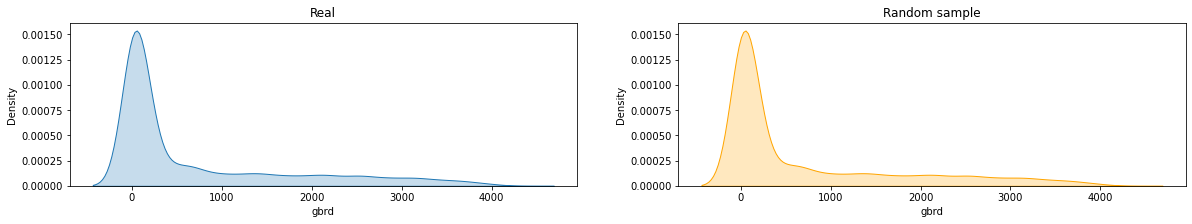

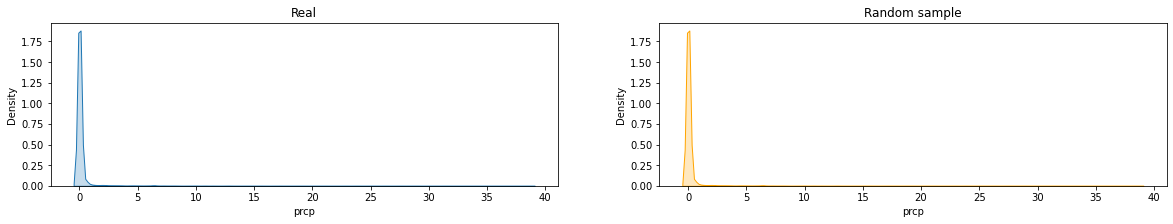

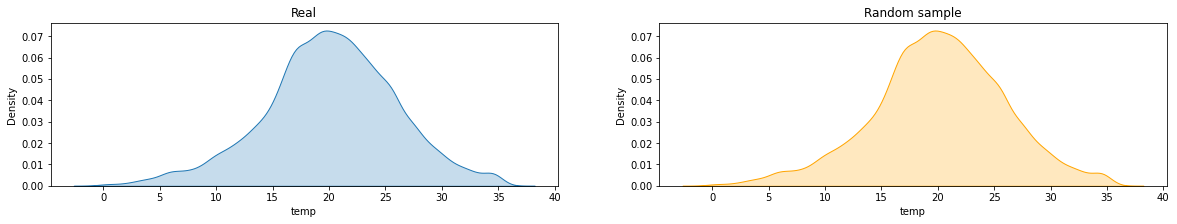

In [23]:
df = source_df[['gbrd', 'prcp', 'temp', 'wdsp', 'hmdy', 'lat', 'wdct', 'gust', 'stp']]
df.dropna()

labels =[gbrd, prcp, temp]

for l in labels:
    fig, axes = plt.subplots(1, 2, figsize=(20, 3))
    sns.kdeplot(ax=axes[0], data=df, x=l, shade=True)

    # Random sample
    sample_data = df.sample(frac=.5)
    sns.kdeplot(ax=axes[1], data=sample_data, x=l, shade=True, color='orange')


    axes[0].set_title('Real')
    axes[1].set_title('Random sample')
    plt.show()

**Step 3. Estimate relations between predictors and chosen target variables. At least, they
should have significant correlation coefficients.**

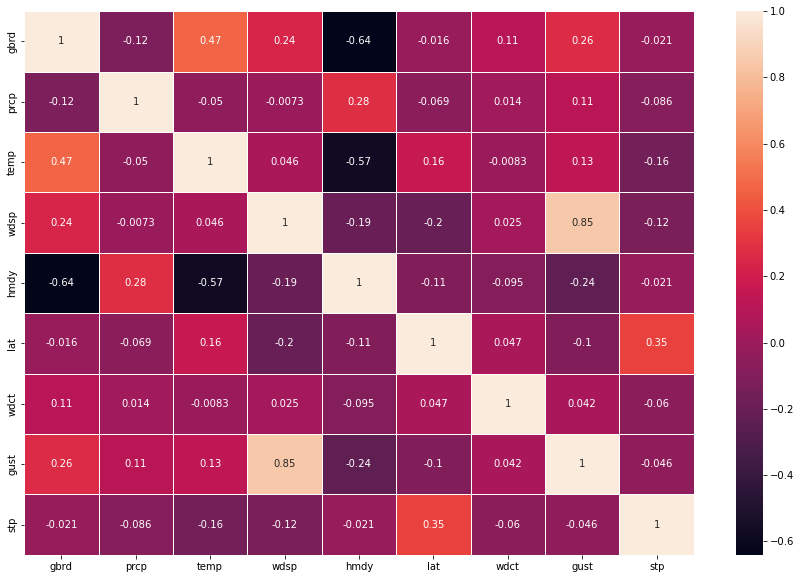

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5)
plt.show()


# corr = {'prcp': ['hmdy', 'gust'],
#         'gbrd': ['wdsp', 'hmdy', 'wdct', 'gust'],
#         'temp': ['hmdy', 'lat', 'gust', "stp"],}

In [1]:
# Build Bayesian network for chosen variables
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.estimators import BicScore
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import TreeSearch

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from collections import Counter
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
# df.drop(df.tail(20).index,inplace=True) # drop last n rows
# df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
# df.dewp.dropna()

df = df.dropna()
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [ ]:
df.info()

In [ ]:
#data preparation
# We should convert continious variables to discrite

data = df
data = data.dropna()

In [ ]:
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="kmeans")
data_descrete = discretizer.fit_transform(data.values)
data_descrete = pd.DataFrame(data_descrete, columns=data_keys)

data_descrete.head()

In [ ]:
def get_scores(data, samples, descritizer=discretizer):

    data_continious = descritizer.inverse_transform(data.values)
    data_continious = pd.DataFrame(data_continious, columns=data_keys)
    sample_continious = descritizer.inverse_transform(samples.values)
    sample_continious = pd.DataFrame(sample_continious, columns=data_keys)

    y_true = np.sort(data_continious['temp'].iloc[:2000].values)
    y_pred = np.sort(sample_continious['temp'].iloc[:2000].values)

    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0,1]
    R_sq = corr**2

    print(f'R-2 score is: {R_sq}')
    print(f'RMSE is: {sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'MAE is: {mean_absolute_error(y_true, y_pred)}')
    return R_sq, sqrt(mean_squared_error(y_true, y_pred)), mape(y_true, y_pred)

In [ ]:
data_rmse = []
data_mape = []
data_r2 = []

In [ ]:
# modeling edges based on the analisys from step 3

model = BayesianModel([
    ('stp', 'lat'),
    ('dewp', 'wdct'),
    ('wdsp', 'gust'),
    ('wdsp', 'gbrd'),
    ('temp', 'gbrd'),
    ('temp', 'hmdy'),
    ('temp', 'dmax')
])

In [ ]:
network = nx.DiGraph()
network.add_edges_from(model.edges())
pos = nx.layout.circular_layout(network)
plt.figure(figsize=(8, 8))
nx.draw(network, pos, with_labels=True, font_weight="bold")

In [ ]:
df_trans = df.iloc[:, :].copy()

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discr = est.fit_transform(df_trans.values[:, :])
df_trans[df_trans.columns[:]] = data_discr

df_prob = df_trans.iloc[:2000, :].copy()
df_trans = df_trans.iloc[2000:,:].copy()

In [ ]:
model.fit(df_trans)

print(model.check_model())

In [ ]:
from seaborn import distributions
from functools import partial
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy
from pgmpy.estimators import HillClimbSearch, TreeSearch, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
k2_scores = {}

k2_scores["manual"] = K2Score(df_trans).score(model)
print(f"K2 score of hand-crafted model {K2Score(df_trans).score(model):.2f}")
print(f"BIC score of hand-crafted model {BicScore(df_trans).score(model):.2f}")

In [ ]:
def sampling(bn: DAG, data: pd.DataFrame, n: int = 100, new: bool = False):
    if new:
        bn_new = BayesianModel(bn.edges())
        bn_new.fit(data)
    else:
        bn_new = bn
    sampler = BayesianModelSampling(bn_new)
    sample = sampler.forward_sample(size=n)
    return sample

In [ ]:
df_s1 = sampling(model, df_prob, n=2000, new=True)
df_s1

In [ ]:
get_scores(df_trans, df_s1)

In [ ]:
r2, rmse, mae = get_scores(df_trans, df_s1)
data_r2.append(r2)
data_rmse.append(rmse)
data_mape.append(mae)

In [ ]:
search = TreeSearch(df_trans, root_node="temp")
tree = search.estimate()

In [ ]:
G_K2 = nx.DiGraph()
G_K2.add_edges_from(tree.edges())
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [ ]:
k2_scores["tree"] = K2Score(df_trans).score(tree)

print(f"K2 score of tree model {K2Score(df_trans).score(tree):.2f}")
print(f"BIC score of tree model {BicScore(df_trans).score(tree):.2f}")

In [ ]:
df_stree = sampling(tree, df_prob, n=2000, new=True)
get_scores(df_trans, df_stree)

In [ ]:
r2, rmse, mae = get_scores(df_trans, df_stree)
data_r2.append(r2)
data_rmse.append(rmse)
data_mape.append(mae)

In [ ]:
search = HillClimbSearch(df_trans)
k2_unconstr = search.estimate()

In [ ]:
G_K2 = nx.DiGraph()
G_K2.add_edges_from(k2_unconstr.edges())
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [ ]:
k2_scores["k2_unconstr"] = K2Score(df_trans).score(k2_unconstr)

print(f"K2 score of unconstrained model {K2Score(df_trans).score(k2_unconstr):.2f}")
print(f"BIC score of unconstrained model {BicScore(df_trans).score(k2_unconstr):.2f}")

In [ ]:
plt.figure(figsize=(15, 10))
x = ["manual", "tree"]
# y = [0.8242023774658618, 0.8898068766957087, 0.9200255171923536]
# y = data_aucs.values
plt.bar(x, [i*100 for i in data_mape])
plt.title('MAPE scores of different methods', fontsize=20)
plt.xlabel('Methods', fontsize=20)
plt.ylabel('MAPE, %', fontsize=20)
# plt.ylim(0.82, 0.95)
plt.show()

In [ ]:
data_mape

In [ ]:
plt.figure(figsize=(15, 10))
x = ["manual", "tree",]
# y = [0.8242023774658618, 0.8898068766957087, 0.9200255171923536]
# y = data_aucs.values
plt.bar(x, data_rmse)
plt.title('RMSE scores of different methods', fontsize=20)
plt.xlabel('Methods', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
# plt.ylim(0.82, 0.95)


In [ ]:
plt.figure(figsize=(15, 10))
x = ["manual", "tree"]
plt.bar(x, data_r2)
plt.title('R2 scores of different methods', fontsize=20)
plt.xlabel('Methods', fontsize=20)
plt.ylabel('R2', fontsize=20)
plt.show()